In [3]:
import detectron2
import torch
import matplotlib.pyplot as plt
import matplotlib
torch.nonzero(torch.tensor([1, 1, 1, 0, 1]), as_tuple=False) # should be instead
from detectron2.engine import DefaultPredictor
# from detectron2.config import get_cfg
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode,Visualizer
from detectron2 import model_zoo
F = plt.gcf()
Size = F.get_size_inches()

import cv2
import numpy as np

class Detector:
    def __init__(self,model_type="OD"):
        self.cfg=get_cfg() 
        if model_type=="OD": #OBJECT DETECTION
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
        elif model_type=="IS": #INSTANCE SEGMENTATION
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
        elif model_type=="KP":#keypoint detection
            self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
            self.cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
        self.cfg.MODEL.DEVICE="cpu"
        self.predictor=DefaultPredictor(self.cfg)


    def onImage(self,imagePath):
        image=cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
#         image = cv2.resize(image, (0, 0), fx = 1/2, fy = 1/2)
        predictions=self.predictor(image)
        viz=Visualizer(image[:,:,::-1],metadata=MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]),
        instance_mode=ColorMode.IMAGE)
       
        output=viz.draw_instance_predictions(predictions["instances"].to("cpu"))
        plt.figure(figsize=(20, 40))
        plt.imshow(output.get_image()[:,:,::-1])

        plt.title("output")
        plt.show()

<Figure size 432x288 with 0 Axes>

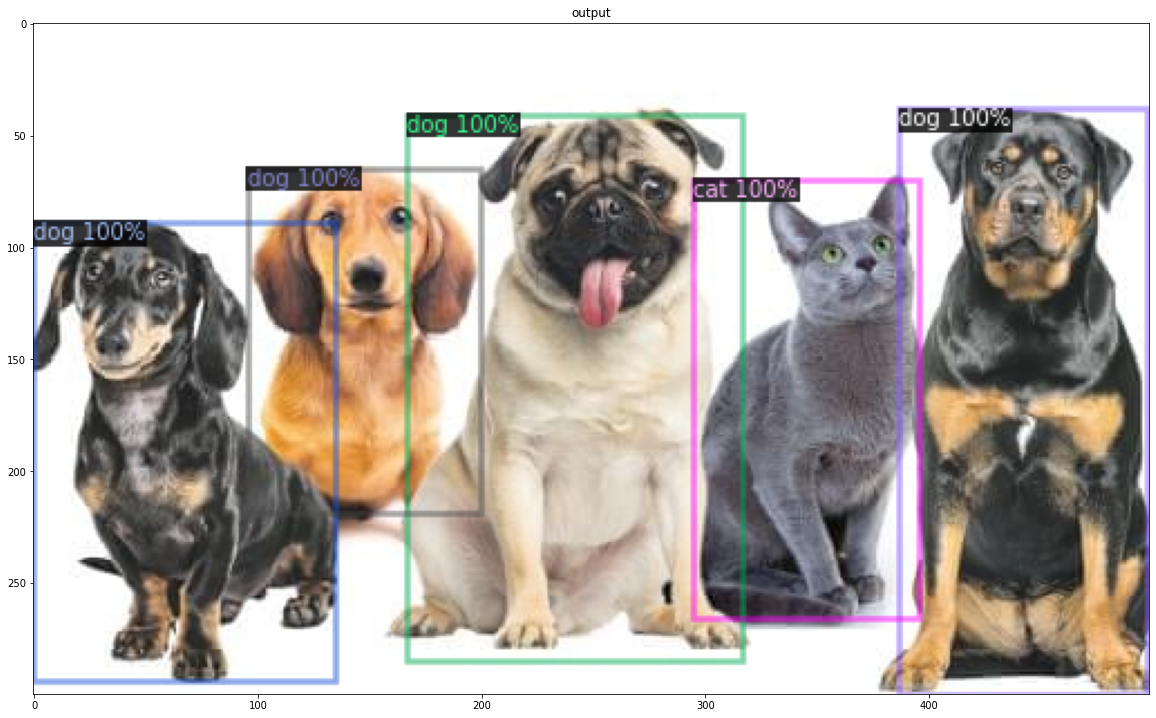

In [5]:
detector=Detector(model_type="OD")
detector.onImage("500.jpg")

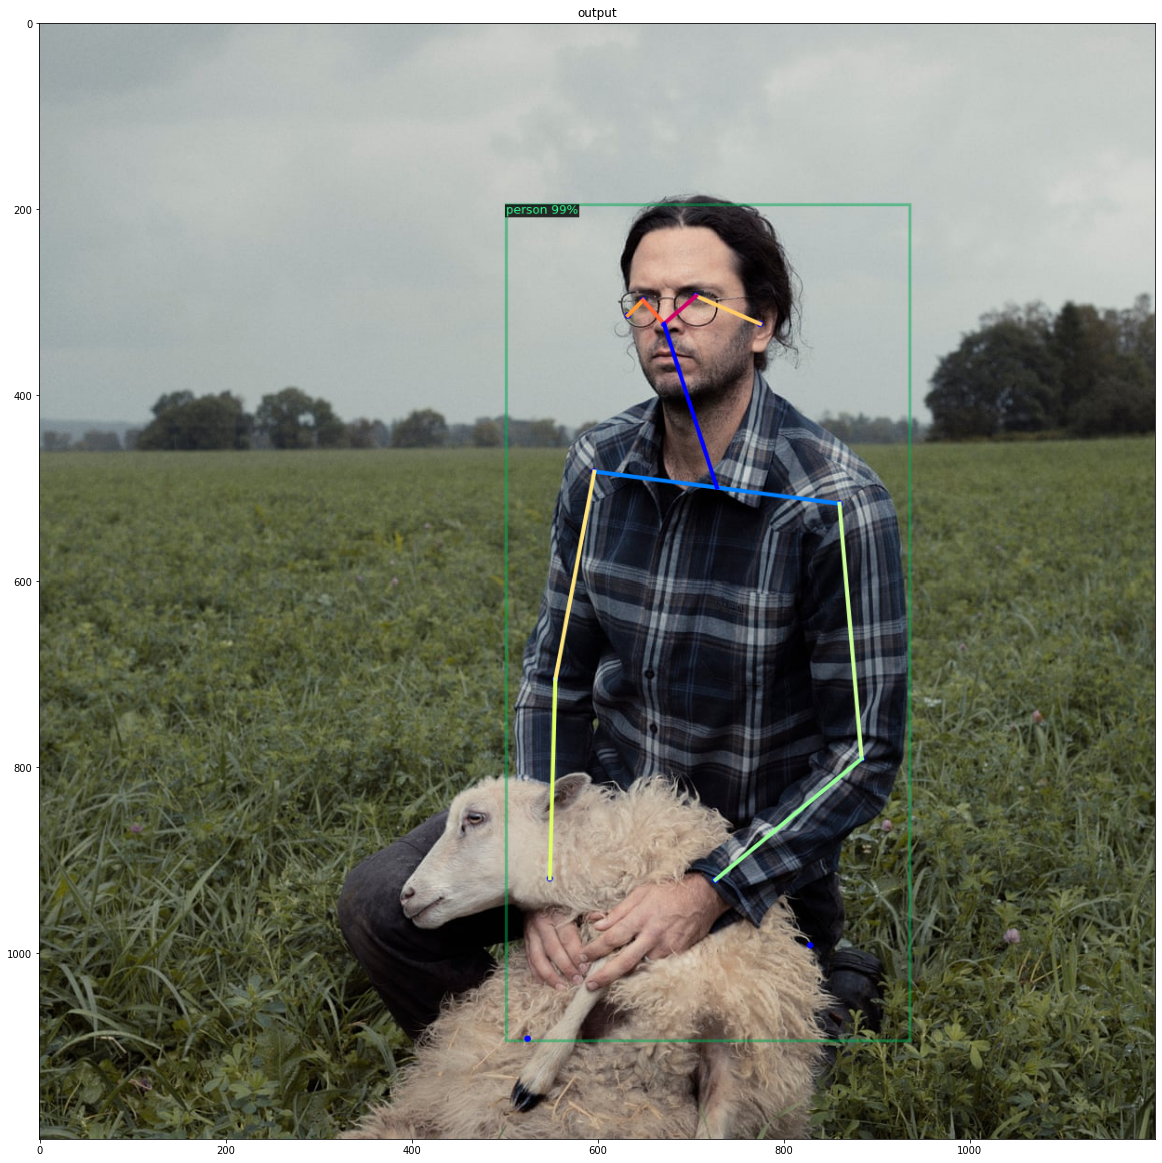

In [6]:
detector=Detector(model_type="KP")
detector.onImage("6698.jpg")

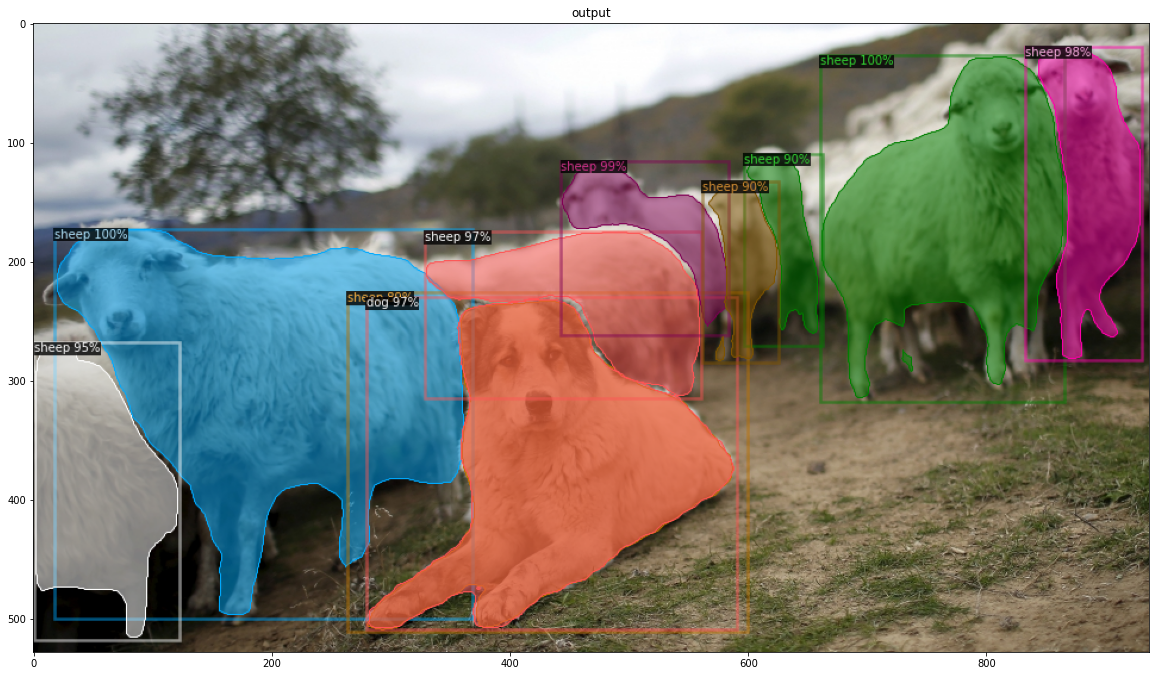

In [7]:
detector=Detector(model_type="IS")
detector.onImage("RTS6K4I.jpg")